<a href="https://colab.research.google.com/github/u1353279/DATA_PHD/blob/main/Final_All_degradation(no_seasonality).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Degredation Analysis for Bedford PV-01

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# settings
plt.style.use('seaborn-white')
plt.rcParams["figure.figsize"] = (7, 5)

In [3]:
import matplotlib.font_manager

In [4]:
font_setting = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
}

In [5]:
bedford_1 = pd.read_excel('/content/drive/MyDrive/PHD/avg_pf (1).xlsx')

In [6]:
bedford_1.head()

,PR-01,PR-02,PR-03,AvG_pf Bedford,PR-01.1,PR-02.1,PR-03.1,AvG_pf leicester,PR-01.2,PR-02.2,PR-03.2,AvG_pf Milton,PR-01.3,PR-02.3,PR-03.3,AvG_pf Northampton,Month count
0,81,80,81,80.666667,78,77,75,76.666667,80,80,81,80.333333,79,79,79,79.0,1
1,82,80,77,79.666667,76,75,75,75.333333,80,80,80,80.000000,79,79,79,79.0,2
2,81,82,83,82.000000,78,77,79,78.000000,82,80,81,81.000000,80,80,80,80.0,3
3,84,83,84,83.666667,78,80,80,79.333333,83,82,83,82.666667,80,80,80,80.0,4
4,85,86,87,86.000000,83,80,82,81.666667,84,84,85,84.333333,81,81,81,81.0,5


In [7]:
bedford_1.drop(columns=['PR-01','PR-02','PR-03','PR-01.1','PR-02.1','PR-03.1','PR-01.2','PR-02.2','PR-03.2','PR-01.3','PR-02.3','PR-03.3'],inplace=True)

In [8]:
bedford_1.head()

,AvG_pf Bedford,AvG_pf leicester,AvG_pf Milton,AvG_pf Northampton,Month count
0,80.666667,76.666667,80.333333,79.0,1
1,79.666667,75.333333,80.000000,79.0,2
2,82.000000,78.000000,81.000000,80.0,3
3,83.666667,79.333333,82.666667,80.0,4
4,86.000000,81.666667,84.333333,81.0,5


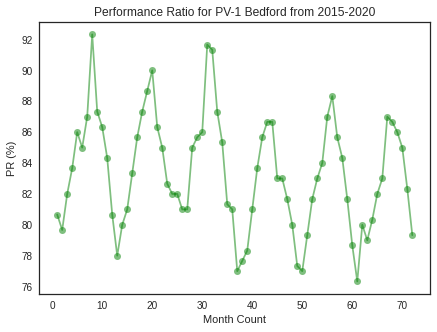

In [9]:
fig, axs = plt.subplots()
axs.plot(bedford_1['Month count'], bedford_1['AvG_pf Bedford'], 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Month Count')
plt.title('Performance Ratio for PV-1 Bedford from 2015-2020')

resolution = 12
s=sm.tsa.seasonal_decompose(bedford_1['AvG_pf Bedford'], model = 'multiplicative', freq = resolution)
#s.plot()

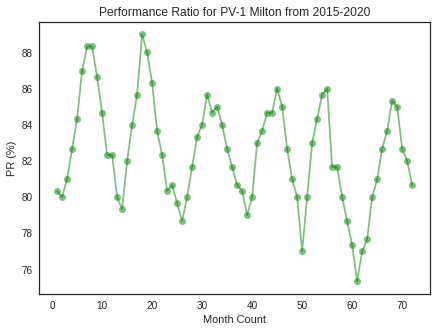

In [10]:
fig, axs = plt.subplots()
axs.plot(bedford_1['Month count'], bedford_1['AvG_pf Milton'], 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Month Count')
plt.title('Performance Ratio for PV-1 Milton from 2015-2020')

resolution = 12
m=sm.tsa.seasonal_decompose(bedford_1['AvG_pf Milton'], model = 'multiplicative', freq = resolution)
#s.plot()

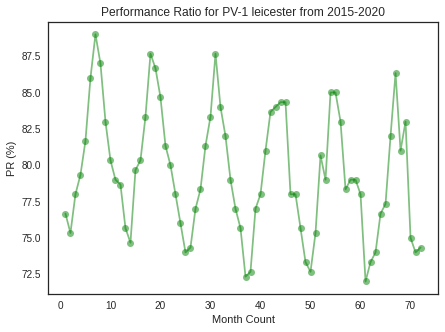

In [11]:
fig, axs = plt.subplots()
axs.plot(bedford_1['Month count'], bedford_1['AvG_pf leicester'], 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Month Count')
plt.title('Performance Ratio for PV-1 leicester from 2015-2020')

resolution = 12
l=sm.tsa.seasonal_decompose(bedford_1['AvG_pf leicester'], model = 'multiplicative', freq = resolution)
#s.plot()

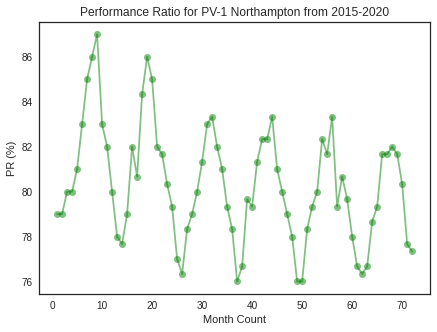

In [12]:
fig, axs = plt.subplots()
axs.plot(bedford_1['Month count'], bedford_1['AvG_pf Northampton'], 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Month Count')
plt.title('Performance Ratio for PV-1 Northampton from 2015-2020')

resolution = 12
n=sm.tsa.seasonal_decompose(bedford_1['AvG_pf Northampton'], model = 'multiplicative', freq = resolution)
#s.plot()

In [14]:
trend_df = pd.DataFrame(list(s.trend), columns = ['Trend'])
trend_df.insert(loc=0, column = 'Month', value=np.arange(len(trend_df)))
trend_df=trend_df[np.isfinite(trend_df['Trend'])]
y_b = trend_df.Trend
x_b = trend_df.Month
x_b, y_b = np.array(x_b), np.array(y_b)

x_b = sm.add_constant(x_b)

In [21]:
trend_df_m = pd.DataFrame(list(m.trend), columns = ['Trend'])
trend_df_m.insert(loc=0, column = 'Month', value=np.arange(len(trend_df_m)))
trend_df_m=trend_df_m[np.isfinite(trend_df_m['Trend'])]
y_m = trend_df_m.Trend
x_m = trend_df_m.Month
x_m, y_m = np.array(x_m), np.array(y_m)

x_m = sm.add_constant(x_m)

In [25]:
trend_df_l = pd.DataFrame(list(l.trend), columns = ['Trend'])
trend_df_l.insert(loc=0, column = 'Month', value=np.arange(len(trend_df_l)))
trend_df_l=trend_df_l[np.isfinite(trend_df_l['Trend'])]
y_l = trend_df_l.Trend
x_l = trend_df_l.Month
x_l, y_l = np.array(x_l), np.array(y_l)

x_l = sm.add_constant(x_l)

In [26]:
trend_df_n = pd.DataFrame(list(n.trend), columns = ['Trend'])
trend_df_n.insert(loc=0, column = 'Month', value=np.arange(len(trend_df_n)))
trend_df_n=trend_df_n[np.isfinite(trend_df_n['Trend'])]
y_n = trend_df_n.Trend
x_n = trend_df_n.Month
x_n, y_n = np.array(x_n), np.array(y_n)

x_n = sm.add_constant(x_n)

In [22]:
model = sm.OLS(y_m,x_m)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     227.1
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           1.03e-21
Time:                        09:35:21   Log-Likelihood:                -47.928
No. Observations:                  60   AIC:                             99.86
Df Residuals:                      58   BIC:                             104.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.6097      0.161    525.259      0.000      84.287      84.932
x1            -0.0615      0.004    -15.069      0.000      -0.070      -0.053
==============================================================================
Omnibus:                        0.046   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.161
Skew:                           0.061   Prob(JB):                        0.923
Kurtosis:                       2.777   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

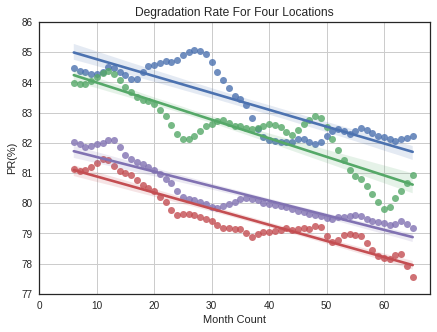

In [23]:

sns.regplot(x=trend_df['Month'],y=trend_df['Trend'])
sns.regplot(x=trend_df['Month'],y=trend_df_m['Trend'])
sns.regplot(x=trend_df['Month'],y=trend_df_l['Trend'])
sns.regplot(x=trend_df['Month'],y=trend_df_n['Trend'])
plt.ylabel("PR(%)")
plt.xlabel("Month Count")
plt.ylim(77,86)
plt.xlim(0, 68)
plt.title("Degradation Rate For Four Locations")
plt.grid(True)
plt.show()
#sns.plt.show()

In [24]:
#confidence level 95%
intercept, slope = results.params
CI_abs = resolution*results.conf_int(alpha = 0.05)[1]
CIL_abs = CI_abs[1]
CIH_abs = CI_abs[0]
round(CIL_abs,2),round(CIH_abs,2)

DR_abs = round(resolution*slope, 2)
DR_abs

-0.74

In [21]:
~results.params

array([ 8.20114372e+01, -4.82290605e-02])

In [16]:
round(12*slope,2)

nan

In [17]:
CI_abs

array([nan, nan])

In [18]:
CI_abs[1]

nan

In [19]:
CI_abs[0]

nan

In [20]:
#confidence level 95%
CI_rel = 100*resolution*results.conf_int(alpha = 0.05)[1]/intercept
CIL_rel = CI_rel[1]
CIH_rel = CI_rel[0]
round(CIL_rel,2),round(CIH_rel,2)

DR_rel = round(100*resolution*slope/intercept,2)
DR_rel

nan

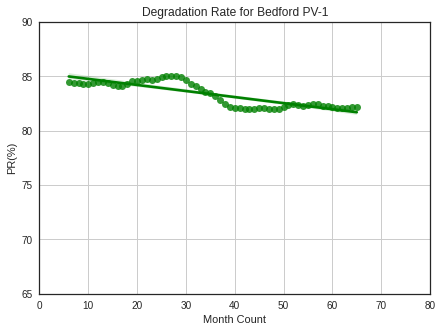

In [34]:
sns.regplot(y = trend_df['Trend'], x = trend_df['Month'], data = bedford_1, color='g')
plt.ylabel("PR(%)")
plt.xlabel("Month Count")
plt.ylim(65,90)
plt.xlim(0, 80)
plt.title("Degradation Rate for Bedford PV-1")
plt.grid(True)
plt.show()

In [44]:
trend_df_m['Trend'].size

60

In [18]:
~frames = [trend_df, trend_df_m]

#concatenate dataframes
df = pd.concat(frames)

# reset index
df.reset_index(drop=True, inplace=True)

#print dataframe
df

,Month,Trend
0,6,84.472222
1,7,84.375000
2,8,84.347222
3,9,84.291667
4,10,84.263889
...,...,...
115,61,79.875000
116,62,80.166667
117,63,80.416667
118,64,80.666667


In [26]:
result = pd.concat([trend_df, trend_df_m], axis=1, join='outer')
display(result)

,Month,Trend,Month,Trend
6,6,84.472222,6,83.986111
7,7,84.375000,7,83.944444
8,8,84.347222,8,83.958333
9,9,84.291667,9,84.055556
10,10,84.263889,10,84.166667
11,11,84.347222,11,84.305556
12,12,84.513889,12,84.375000
13,13,84.486111,13,84.277778
14,14,84.347222,14,84.069444
15,15,84.250000,15,83.847222


In [29]:
gfg_csv_data = result.to_csv('GfG.csv', index = False)

In [30]:
print('\nCSV String:\n', gfg_csv_data)


CSV String:
 None


In [31]:
result.to_csv('data.csv')
!cp data.csv "drive/My Drive/"